За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

In [2]:
from IPython.display import display, Math, Latex
display(Math(r'I_{I,filt}=HI_f'))

<IPython.core.display.Math object>

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass
gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во
фреквенциски домен е дефиниран со равенката:

In [37]:
display (Math (r'$H(i,j)=e^{-\frac{d(i,j)^2}{f^2_h}}(1-e^{-\frac{d(i,j)^2}{f^2_i}})$'))
            


<IPython.core.display.Math object>

In [ ]:
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со
користење на Фуриева трансформација. Фуриевата трансформација е дефинирана
како:

In [4]:
display (Math (r'$F(u,v)= {\int\limits}{\int\limits}_{-\infty}^{\infty} f(x,y) e^{-2\pi(ux+vy)} dxdy $'))

<IPython.core.display.Math object>

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [ ]:
А во дискретниот домен горната равенка може да биде преведена како:
    

In [15]:
display (Math (r'$F(u,v)={\sum\limits}{m}^{\infty}{\sum\limits}_{n=-\infty}^{m} f[m,n] * e^{-2\pi(umx + vny)}'))

<IPython.core.display.Math object>

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со
користење на инверзна Фуриева трансформација. Инверзната Фуриева
трансформација е дефинирана како:

In [17]:
display (Math (r'$f(x,y)={\int\limits}{\int\limits}_{-\infty}^{\infty}F(u,v)e^{i2\pi(ux+vy)dudv}'))

<IPython.core.display.Math object>

In [ ]:
А во дискретниот домен горната равенка може да биде преведена како:


In [30]:
display (Math (r'$f(x,y)={\sum\limits}{m=-\infty}^{\infty}{\sum\limits}{n=-\infty}^{\infty}F(m,n)*e^{i2\pi(xmn+ynv)}'))

<IPython.core.display.Math object>

In [27]:
def bf_filter(nx,ny,d0,d1):
    result=np.ones((nx,ny))
    for i in range(0,nx-1):
        for j in range(0,ny-1):
            dist=np.sqrt((i-nx/2)**2 + (j-ny/2)**2)
            result[i+1][j+1]=np.exp(-(dist**2)/(d1**2))*(1.0-np.exp(-(dist**2)/(d0**2)))
    result[nx//2+1][ny//2+1]=1
    return result;

def get_fft_img(img):
    f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shifted = np.fft.fftshift(f)
    f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
    return f_complex;

def get_image_from_fft(f_filtered):
    f_filtered_shifted = np.fft.fftshift(f_filtered)
    inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    return filtered_img

def get_result_img(fft_img,filter):
    return fft_img*filter;

def draw_img(img):
    plt.imshow(img.astype(np.uint8), cmap='gray')
    
def two_img(f,img1,img2):
    f.add_subplot(1,2, 1)
    plt.imshow(img1, cmap='gray')
    f.add_subplot(1,2, 2)
    plt.imshow(img2, cmap='gray')
    plt.show(block=True)
    f.clf()
    return f;


def do_job(d0,d1):
    img = cv2.imread('./barbara.png') # load an image
    img = img[:,:,2] # blue channel

    filter = bf_filter(512,512,d0,d1)
    fft_img = get_fft_img(img)
    f_image=fft_img*filter;
    f_img = get_image_from_fft(f_image);
    f = plt.figure()
    f=two_img(f,f_img,(filter*255).astype(np.uint8))
    return f;


In [3]:
from ipywidgets import widgets
rangeSlider = widgets.IntRangeSlider(
    value=[1, 101],
    min=1,
    max=101,
    step=10,
    description='Frequency cutoffs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
out = widgets.Output(layout={'border': '1px solid black'})
out.append_stdout('Output appended with append_stdout')

In [4]:
def response(change):
    d0,d1=change['new']
    do_job(d0,d1);
rangeSlider.observe(response, names="value")

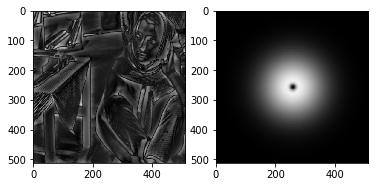

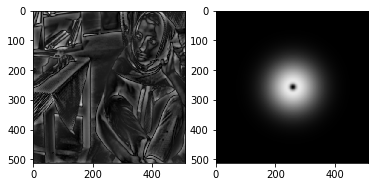

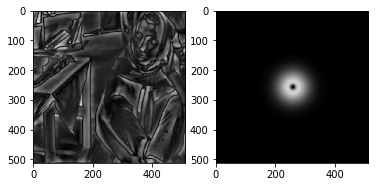

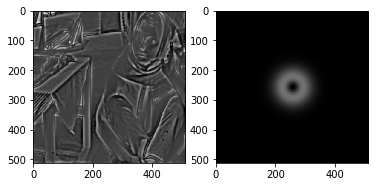

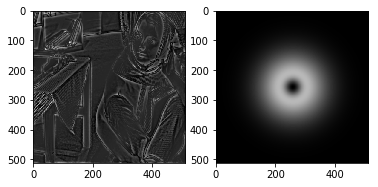

In [5]:
widgets.HBox([rangeSlider])